<a href="https://colab.research.google.com/github/Sanskruti-Shete/CNN-ML-Models/blob/main/Fruits.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [ ]:
pip install opendatasets

In [ ]:
pip install pandas

In [ ]:
import opendatasets as od
import pandas

od.download("https://www.kaggle.com/datasets/kritikseth/fruit-and-vegetable-image-recognition?select=test")

Please provide your Kaggle credentials to download this dataset. Learn more: http://bit.ly/kaggle-creds
Your Kaggle username: sanskrutishete
Your Kaggle Key: ··········
Dataset URL: https://www.kaggle.com/datasets/kritikseth/fruit-and-vegetable-image-recognition


100%|██████████| 1.98G/1.98G [00:15<00:00, 138MB/s] 

#Importing libraries

In [ ]:
import numpy as np
import tensorflow as tf
import matplotlib.pyplot as plt

#Data Preprocessing

##Training Image Preprocessing

In [ ]:
training_set = tf.keras.utils.image_dataset_from_directory('/content/fruit-and-vegetable-image-recognition/train', labels='inferred', label_mode='categorical', class_names=None, color_mode='rgb', batch_size=32, image_size=(64,64), shuffle=True, seed=None, validation_split=None, subset=None, interpolation='bilinear', follow_links=False, crop_to_aspect_ratio=False)

Found 3115 files belonging to 36 classes.


##Validation Image Preprocessing

In [ ]:
validation_set = tf.keras.utils.image_dataset_from_directory('/content/fruit-and-vegetable-image-recognition/validation', labels='inferred', label_mode='categorical', class_names=None, color_mode='rgb', batch_size=32, image_size=(64,64), shuffle=True, seed=None, validation_split=None, subset=None, interpolation='bilinear', follow_links=False, crop_to_aspect_ratio=False)

Found 351 files belonging to 36 classes.


#Building the model

In [ ]:
cnn = tf.keras.models.Sequential()

##Building Convolution Layer

In [ ]:
cnn.add(tf.keras.layers.Conv2D(filters=64, kernel_size=3, activation='relu', input_shape=[64,64,3]))
cnn.add(tf.keras.layers.MaxPool2D(pool_size=2, strides=2))

/usr/local/lib/python3.11/dist-packages/keras/src/layers/convolutional/base_conv.py:107: UserWarning: Do not pass an `input_shape`/`input_dim` argument to a layer. When using Sequential models, prefer using an `Input(shape)` object as the first layer in the model instead.
  super().__init__(activity_regularizer=activity_regularizer, **kwargs)


In [ ]:
cnn.add(tf.keras.layers.Conv2D(filters=64, kernel_size=3, activation='relu'))
cnn.add(tf.keras.layers.MaxPool2D(pool_size=2, strides=2))

In [ ]:
cnn.add(tf.keras.layers.Dropout(0.5))  #To avoid overfitting

In [ ]:
cnn.add(tf.keras.layers.Flatten())

In [ ]:
cnn.add(tf.keras.layers.Dense(units=128, activation='relu'))

In [ ]:
#Output Layer
cnn.add(tf.keras.layers.Dense(units=36, activation='softmax'))

#Compiling and Training Phase

In [ ]:
cnn.compile(optimizer='rmsprop', loss='categorical_crossentropy', metrics=['accuracy'])

In [ ]:
training_history=cnn.fit(x=training_set, validation_data=validation_set, epochs=30)

Epoch 1/30
98/98 ━━━━━━━━━━━━━━━━━━━━ 121s 1s/step - accuracy: 0.0383 - loss: 48.4940 - val_accuracy: 0.0741 - val_loss: 4.6541
Epoch 2/30
98/98 ━━━━━━━━━━━━━━━━━━━━ 117s 970ms/step - accuracy: 0.0612 - loss: 3.9959 - val_accuracy: 0.2023 - val_loss: 3.2589
Epoch 3/30
98/98 ━━━━━━━━━━━━━━━━━━━━ 142s 970ms/step - accuracy: 0.0984 - loss: 3.6486 - val_accuracy: 0.1481 - val_loss: 4.5405
Epoch 4/30
98/98 ━━━━━━━━━━━━━━━━━━━━ 144s 987ms/step - accuracy: 0.1486 - loss: 3.4725 - val_accuracy: 0.3960 - val_loss: 2.5961
Epoch 5/30
98/98 ━━━━━━━━━━━━━━━━━━━━ 149s 1s/step - accuracy: 0.2243 - loss: 3.0861 - val_accuracy: 0.4900 - val_loss: 2.2766
Epoch 6/30
98/98 ━━━━━━━━━━━━━━━━━━━━ 134s 980ms/step - accuracy: 0.2582 - loss: 2.9414 - val_accuracy: 0.5185 - val_loss: 2.1967
Epoch 7/30
98/98 ━━━━━━━━━━━━━━━━━━━━ 95s 959ms/step - accuracy: 0.3068 - loss: 3.0267 - val_accuracy: 0.4957 - val_loss: 2.0227
Epoch 8/30
98/98 ━━━━━━━━━━━━━━━━━━━━ 96s 974ms/step - accuracy: 0.3895 - loss: 2.3499 - val_acc

##Saving Model

In [ ]:
cnn.save('trained_model.h5')

In [ ]:
training_history.history #Return dictionary of history

{'accuracy': [0.04205457493662834,
  0.07158908247947693,
  0.11878009885549545,
  0.16886034607887268,
  0.22857142984867096,
  0.26516854763031006,
  0.33001604676246643,
  0.39871588349342346,
  0.4471909999847412,
  0.5059390068054199,
  0.5544141530990601,
  0.5990369319915771,
  0.6250401139259338,
  0.6417335271835327,
  0.680898904800415,
  0.715569794178009,
  0.7345104217529297,
  0.7515248656272888,
  0.768539309501648,
  0.780738353729248,
  0.8003210425376892,
  0.7839486598968506,
  0.8105939030647278,
  0.8157303333282471,
  0.8189406394958496,
  0.8298555612564087,
  0.8500802516937256,
  0.8436596989631653,
  0.8359550833702087,
  0.8606741428375244],
 'loss': [14.808405876159668,
  3.8716704845428467,
  3.640756130218506,
  3.4110820293426514,
  3.2063071727752686,
  3.095242977142334,
  2.884007215499878,
  2.344928503036499,
  2.284198760986328,
  2.00384783744812,
  1.7854089736938477,
  1.6278795003890991,
  1.5225160121917725,
  1.4918729066848755,
  1.3233381509

In [ ]:
#Recording History
import json
with open('training_hist.json', 'w') as f:
    json.dump(training_history.history, f)

In [ ]:
print(training_history.history.keys())

dict_keys(['accuracy', 'loss', 'val_accuracy', 'val_loss'])


##Calculating accuracy of model achieved on Validation Set

In [ ]:
print("Validation Set Accuracy: {} %".format(training_history.history['val_accuracy'][-1]*100))

Validation Set Accuracy: 77.77777910232544 %


#Accuracy Visualization

In [ ]:
##Training Visualization

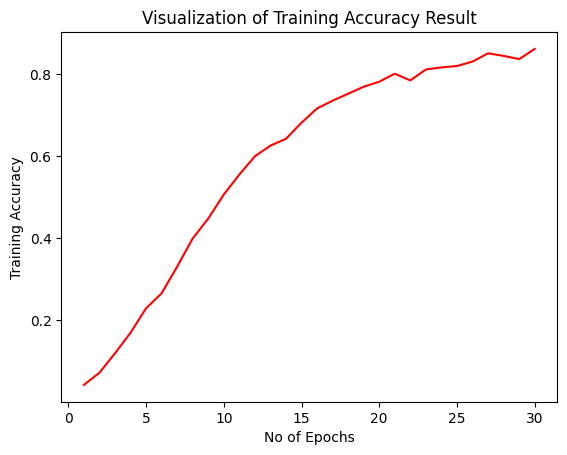

In [ ]:
epochs = [i for i in range(1,31)]
plt.plot(epochs, training_history.history['accuracy'],  color='red')
plt.xlabel('No of Epochs')
plt.ylabel('Training Accuracy')
plt.title('Visualization of Training Accuracy Result')
plt.show()

##Validation Accuracy

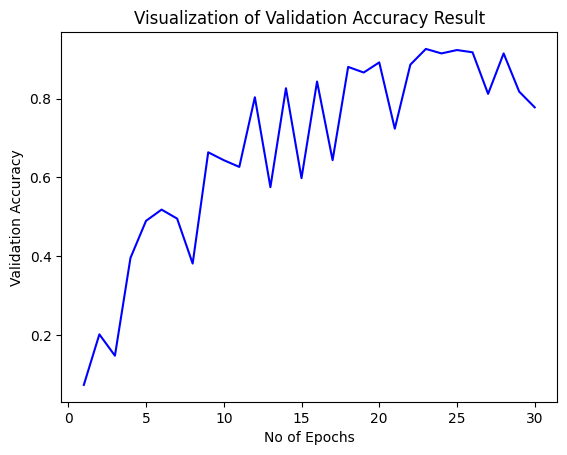

In [ ]:
plt.plot(epochs, training_history.history['val_accuracy'],  color='blue')
plt.xlabel('No of Epochs')
plt.ylabel('Validation Accuracy')
plt.title('Visualization of Validation Accuracy Result')
plt.show()